### Q1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
# 读取TRD_Mnth.xlxs表格
trd_df = pd.read_excel("/Users/sharry/Downloads/TRD_Mnth.xlsx")

trd_df = trd_df.drop([0,1])

trd_df = trd_df.reset_index(drop=True)

trd_df.columns = ['Stock_Code', 'Trading_Month', 'Monthly_close_price', 'Monthly_Return']

trd_df['Trading_Month'] = pd.to_datetime(trd_df['Trading_Month']).dt.to_period('M')
trd_df['Year'] = trd_df['Trading_Month'].dt.year
trd_df['Quarter'] = trd_df['Trading_Month'].dt.quarter
trd_df['Year_Quarter'] = trd_df['Year'].astype(str) + 'Q' + trd_df['Quarter'].astype(str)

def previous_quarter(yq):
    
    year, quarter = int(yq[:4]), int(yq[-1])
    
    if quarter > 1:
        return f"{year}Q{quarter - 1}"

    else:
        return f"{year - 1}Q4"

trd_df['Date_YQ'] = trd_df['Year_Quarter'].apply(previous_quarter)

trd_df

,Stock_Code,Trading_Month,Monthly_close_price,Monthly_Return,Year,Quarter,Year_Quarter,Date_YQ
0,000001,2009-12,24.37,0.004534,2009,4,2009Q4,2009Q3
1,000001,2010-01,21.7,-0.109561,2010,1,2010Q1,2009Q4
2,000001,2010-02,22.45,0.034562,2010,1,2010Q1,2009Q4
3,000001,2010-03,23.2,0.033408,2010,1,2010Q1,2009Q4
4,000001,2010-04,20.56,-0.113793,2010,2,2010Q2,2010Q1
...,...,...,...,...,...,...,...,...
542338,873726,2023-10,21.8,NaN,2023,4,2023Q4,2023Q3
542339,873726,2023-11,29.15,0.337156,2023,4,2023Q4,2023Q3
542340,873726,2023-12,43.64,0.497084,2023,4,2023Q4,2023Q3
542341,873833,2023-11,14.25,NaN,2023,4,2023Q4,2023Q3


In [5]:
# 读取FI_T9.xlxs表格
fi_df = pd.read_excel("/Users/sharry/Downloads/FI_T9.xlsx")

fi_df = fi_df.drop([0, 1])

fi_df = fi_df.reset_index(drop=True)

fi_df = fi_df[fi_df['Typrep'] != 'B']
fi_df = fi_df.drop(columns=['Typrep'])

fi_df.columns = ['Stock_Code', 'ShortName', 'Date', 'Net_Assets_per_Share']

fi_df['Date'] = pd.to_datetime(fi_df['Date']).dt.to_period('M')
fi_df['Year'] = fi_df['Date'].dt.year
fi_df['Quarter'] = fi_df['Date'].dt.quarter
fi_df['Date_YQ'] = fi_df['Year'].astype(str) + 'Q' + fi_df['Quarter'].astype(str)

fi_df = fi_df.drop(columns=['ShortName','Year', 'Quarter'])

fi_df

,Stock_Code,Date,Net_Assets_per_Share,Date_YQ
0,000001,2009-09,6.146785,2009Q3
1,000001,2009-12,6.591545,2009Q4
2,000001,2010-03,7.119722,2010Q1
3,000001,2010-06,8.729121,2010Q2
4,000001,2010-09,9.223531,2010Q3
...,...,...,...,...
380293,873806,2023-09,4.768257,2023Q3
380295,873833,2022-06,6.901316,2022Q2
380297,873833,2022-12,6.99489,2022Q4
380299,873833,2023-03,7.152908,2023Q1


In [6]:
merged_df = pd.merge(trd_df, fi_df, on=['Stock_Code', 'Date_YQ'], how='left')

merged_df

,Stock_Code,Trading_Month,Monthly_close_price,Monthly_Return,Year,Quarter,Year_Quarter,Date_YQ,Date,Net_Assets_per_Share
0,000001,2009-12,24.37,0.004534,2009,4,2009Q4,2009Q3,2009-09,6.146785
1,000001,2010-01,21.7,-0.109561,2010,1,2010Q1,2009Q4,2009-12,6.591545
2,000001,2010-02,22.45,0.034562,2010,1,2010Q1,2009Q4,2009-12,6.591545
3,000001,2010-03,23.2,0.033408,2010,1,2010Q1,2009Q4,2009-12,6.591545
4,000001,2010-04,20.56,-0.113793,2010,2,2010Q2,2010Q1,2010-03,7.119722
...,...,...,...,...,...,...,...,...,...,...
542338,873726,2023-10,21.8,NaN,2023,4,2023Q4,2023Q3,2023-09,4.578955
542339,873726,2023-11,29.15,0.337156,2023,4,2023Q4,2023Q3,2023-09,4.578955
542340,873726,2023-12,43.64,0.497084,2023,4,2023Q4,2023Q3,2023-09,4.578955
542341,873833,2023-11,14.25,NaN,2023,4,2023Q4,2023Q3,NaT,NaN


In [7]:
df3 = merged_df.copy()

# Filter out rows where 'Net_Assets_per_Share' equals zero
df3 = df3[df3['Net_Assets_per_Share'] != 0]

# Perform the division, NaN will be preserved where the denominator is 0
df3['Monthly_PB'] = df3['Monthly_close_price'] / df3['Net_Assets_per_Share']

# Drop rows where either 'Monthly_close_price' or 'Net_Assets_per_Share' is NaN
df3 = df3.dropna(subset=['Monthly_close_price', 'Net_Assets_per_Share'])

# Drop unnecessary columns
df3 = df3.drop(columns=['Monthly_close_price', 'Net_Assets_per_Share', 'Year_Quarter', 'Date_YQ', 'Date', 'Year', 'Quarter'])

# Display the resulting DataFrame
df3

,Stock_Code,Trading_Month,Monthly_Return,Monthly_PB
0,000001,2009-12,0.004534,3.964674
1,000001,2010-01,-0.109561,3.292096
2,000001,2010-02,0.034562,3.405878
3,000001,2010-03,0.033408,3.51966
4,000001,2010-04,-0.113793,2.887753
...,...,...,...,...
542336,873693,2023-12,-0.168535,9.425669
542337,873703,2023-12,NaN,3.810224
542338,873726,2023-10,NaN,4.760912
542339,873726,2023-11,0.337156,6.366081


In [8]:
# 计算P/B比率的第5个和第95个百分位数
low_threshold = np.percentile(df3['Monthly_PB'], 5)
high_threshold = np.percentile(df3['Monthly_PB'], 95)

print(low_threshold)
print(high_threshold)

0.8176668236746772
10.211766877799416


In [9]:
# 根据阈值筛选数据
filtered_data = df3[(df3['Monthly_PB'] >= low_threshold) & (df3['Monthly_PB'] <= high_threshold)]

filtered_data

,Stock_Code,Trading_Month,Monthly_Return,Monthly_PB
0,000001,2009-12,0.004534,3.964674
1,000001,2010-01,-0.109561,3.292096
2,000001,2010-02,0.034562,3.405878
3,000001,2010-03,0.033408,3.51966
4,000001,2010-04,-0.113793,2.887753
...,...,...,...,...
542336,873693,2023-12,-0.168535,9.425669
542337,873703,2023-12,NaN,3.810224
542338,873726,2023-10,NaN,4.760912
542339,873726,2023-11,0.337156,6.366081


In [10]:
filtered_data = filtered_data[filtered_data['Monthly_Return'] != 'NaN']

In [11]:
print(filtered_data.dtypes)

Stock_Code           object
Trading_Month     period[M]
Monthly_Return       object
Monthly_PB           object
dtype: object


In [12]:
filtered_data

,Stock_Code,Trading_Month,Monthly_Return,Monthly_PB
0,000001,2009-12,0.004534,3.964674
1,000001,2010-01,-0.109561,3.292096
2,000001,2010-02,0.034562,3.405878
3,000001,2010-03,0.033408,3.51966
4,000001,2010-04,-0.113793,2.887753
...,...,...,...,...
542336,873693,2023-12,-0.168535,9.425669
542337,873703,2023-12,NaN,3.810224
542338,873726,2023-10,NaN,4.760912
542339,873726,2023-11,0.337156,6.366081


In [13]:
roe_df = pd.read_excel("/Users/sharry/Downloads/FI_T5.xlsx")

roe_df = roe_df.drop([0, 1])

roe_df = roe_df.reset_index(drop=True)

roe_df['Accper'] = pd.to_datetime(roe_df['Accper'])

roe_df.rename(columns={'Accper': 'TradingDate'}, inplace=True)

roe_df = roe_df[roe_df['Typrep'] != 'B']
roe_df = roe_df.drop(columns=['Typrep', 'ShortName_EN'])

roe_df.columns = ['Stock_Code', 'Trading_Month', 'ROE']

roe_df['Trading_Month'] = pd.to_datetime(roe_df['Trading_Month']).dt.to_period('M')

roe_df

,Stock_Code,Trading_Month,ROE
0,000001,2009-09,0.049887
1,000001,2009-12,0.272887
2,000001,2010-03,0.280066
3,000001,2010-06,0.237663
4,000001,2010-09,0.239194
...,...,...,...
383800,873806,2023-09,NaN
383802,873833,2022-06,NaN
383804,873833,2022-12,NaN
383806,873833,2023-03,NaN


In [14]:
merged_df2 = pd.merge(filtered_data, roe_df, on=['Stock_Code', 'Trading_Month'], how='left')

merged_df2

,Stock_Code,Trading_Month,Monthly_Return,Monthly_PB,ROE
0,000001,2009-12,0.004534,3.964674,0.272887
1,000001,2010-01,-0.109561,3.292096,NaN
2,000001,2010-02,0.034562,3.405878,NaN
3,000001,2010-03,0.033408,3.51966,0.280066
4,000001,2010-04,-0.113793,2.887753,NaN
...,...,...,...,...,...
487565,873693,2023-12,-0.168535,9.425669,NaN
487566,873703,2023-12,NaN,3.810224,0.173437
487567,873726,2023-10,NaN,4.760912,NaN
487568,873726,2023-11,0.337156,6.366081,NaN


In [15]:
# 读取STK_MKT_STKBTAL.xlsx表格
volatility_df = pd.read_excel("/Users/sharry/Downloads/STK_MKT_STKBTAL.xlsx")

volatility_df = volatility_df.drop([0, 1])

volatility_df = volatility_df.reset_index(drop=True)

volatility_df.columns = ['Stock_Code', 'Trading_Month', 'Volatility']
volatility_df['Trading_Month'] = pd.to_datetime(volatility_df['Trading_Month']).dt.to_period('M')

volatility_df

,Stock_Code,Trading_Month,Volatility
0,000001,2010-12,0.375077
1,000002,2010-12,0.360978
2,000004,2010-12,0.382118
3,000005,2010-12,0.409691
4,000006,2010-12,0.502408
...,...,...,...
1584,601958,2010-12,0.51764
1585,601988,2010-12,0.201127
1586,601991,2010-12,0.28514
1587,601998,2010-12,0.357737


In [16]:
df7 = merged_df2.copy()
merged_df3 = pd.merge(df7, volatility_df, on=['Stock_Code', 'Trading_Month'], how='left')

merged_df3

,Stock_Code,Trading_Month,Monthly_Return,Monthly_PB,ROE,Volatility
0,000001,2009-12,0.004534,3.964674,0.272887,NaN
1,000001,2010-01,-0.109561,3.292096,NaN,NaN
2,000001,2010-02,0.034562,3.405878,NaN,NaN
3,000001,2010-03,0.033408,3.51966,0.280066,NaN
4,000001,2010-04,-0.113793,2.887753,NaN,NaN
...,...,...,...,...,...,...
487565,873693,2023-12,-0.168535,9.425669,NaN,NaN
487566,873703,2023-12,NaN,3.810224,0.173437,NaN
487567,873726,2023-10,NaN,4.760912,NaN,NaN
487568,873726,2023-11,0.337156,6.366081,NaN,NaN


In [17]:
df8 = merged_df3.copy()

df8 = df8[df8['Trading_Month'] == '2010-12']
df8 = df8.dropna(subset=['Monthly_PB', 'ROE', 'Volatility'])

df8

,Stock_Code,Trading_Month,Monthly_Return,Monthly_PB,ROE,Volatility
10,000001,2010-12,-0.036608,1.711926,0.234177,0.375077
127,000002,2010-12,0.01107,1.831914,0.176802,0.360978
254,000004,2010-12,-0.063764,7.999336,0.18446,0.382118
376,000005,2010-12,-0.046753,4.969425,-0.006426,0.409691
524,000006,2010-12,0.013081,2.436701,0.209026,0.502408
...,...,...,...,...,...,...
421195,601958,2010-12,0.012954,5.873981,0.062149,0.51764
421942,601988,2010-12,-0.012232,1.371196,0.179594,0.201127
422230,601991,2010-12,-0.077273,2.026694,0.105288,0.28514
422619,601998,2010-12,-0.033149,1.693021,0.188118,0.357737


In [18]:
print(df8.dtypes)

Stock_Code           object
Trading_Month     period[M]
Monthly_Return       object
Monthly_PB           object
ROE                  object
Volatility           object
dtype: object


In [19]:
# Convert 'ROE' column to float
df8['ROE'] = pd.to_numeric(df8['ROE'], errors='coerce')

# Convert 'Volatility' column to float
df8['Volatility'] = pd.to_numeric(df8['Volatility'], errors='coerce')

# Display the data types to confirm the conversion
print(df8.dtypes)

Stock_Code           object
Trading_Month     period[M]
Monthly_Return       object
Monthly_PB           object
ROE                 float64
Volatility          float64
dtype: object


In [20]:
df8['Monthly_Return'] = pd.to_numeric(df8['Monthly_Return'], errors='coerce')

df8['Monthly_PB'] = pd.to_numeric(df8['Monthly_PB'], errors='coerce')

# Display the data types to confirm the conversion
print(df8.dtypes)

Stock_Code           object
Trading_Month     period[M]
Monthly_Return      float64
Monthly_PB          float64
ROE                 float64
Volatility          float64
dtype: object


In [21]:
X = df8[['ROE', 'Volatility']]
y = df8['Monthly_PB']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Monthly_PB   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     106.8
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           7.39e-44
Time:                        23:01:40   Log-Likelihood:                -2896.5
No. Observations:                1390   AIC:                             5799.
Df Residuals:                    1387   BIC:                             5815.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1280      0.289      0.442      0.658      -0.440       0.696
ROE            1.8154      0.455      3.988      0.000       0.922       2.708
Volatility     8.7550      0.631     13.880      0.000       7.518       9.992
==============================================================================
Omnibus:                      131.062   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.404
Skew:                           0.704   Prob(JB):                     3.70e-43
Kurtosis:                       4.178   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Q2

In [46]:
df9 = filtered_data.copy()

df9

,Stock_Code,Trading_Month,Monthly_Return,Monthly_PB
0,000001,2009-12,0.004534,3.964674
1,000001,2010-01,-0.109561,3.292096
2,000001,2010-02,0.034562,3.405878
3,000001,2010-03,0.033408,3.51966
4,000001,2010-04,-0.113793,2.887753
...,...,...,...,...
542336,873693,2023-12,-0.168535,9.425669
542337,873703,2023-12,NaN,3.810224
542338,873726,2023-10,NaN,4.760912
542339,873726,2023-11,0.337156,6.366081


In [47]:
print(df9.dtypes)

Stock_Code           object
Trading_Month     period[M]
Monthly_Return       object
Monthly_PB           object
dtype: object


In [48]:
df9['Monthly_Return'] = pd.to_numeric(df9['Monthly_Return'], errors='coerce')

df9['Monthly_PB'] = pd.to_numeric(df9['Monthly_PB'], errors='coerce')

In [49]:
print(df9.dtypes)

Stock_Code           object
Trading_Month     period[M]
Monthly_Return      float64
Monthly_PB          float64
dtype: object


In [50]:
df9

,Stock_Code,Trading_Month,Monthly_Return,Monthly_PB
0,000001,2009-12,0.004534,3.964674
1,000001,2010-01,-0.109561,3.292096
2,000001,2010-02,0.034562,3.405878
3,000001,2010-03,0.033408,3.519660
4,000001,2010-04,-0.113793,2.887753
...,...,...,...,...
542336,873693,2023-12,-0.168535,9.425669
542337,873703,2023-12,NaN,3.810224
542338,873726,2023-10,NaN,4.760912
542339,873726,2023-11,0.337156,6.366081


In [51]:
def sort_firms_by_pb_ratios(df):
    
    df.sort_values(by=['Trading_Month', 'Stock_Code'], inplace=True)
    
    df['Last_Month_PB'] = np.nan
    
    for stock_code, group in df.groupby('Stock_Code'):
        df.loc[group.index, 'Last_Month_PB'] = group['Monthly_PB'].shift(1)
    
    df.dropna(subset=['Last_Month_PB'], inplace=True)
    
    def assign_deciles(group):
        group['PB_Decile'] = pd.qcut(group['Last_Month_PB'], 10, labels=False)
        return group

    df = df.groupby('Trading_Month').apply(assign_deciles)
    
    df = df.reset_index(drop=True)

    return df

In [52]:
df9 = sort_firms_by_pb_ratios(df9)

df9

/var/folders/bm/sthpkgp95hz4cn3v97qms_zw0000gn/T/ipykernel_35244/2499530386.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Trading_Month').apply(assign_deciles)


,Stock_Code,Trading_Month,Monthly_Return,Monthly_PB,Last_Month_PB,PB_Decile
0,000001,2010-01,-0.109561,3.292096,3.964674,4
1,000002,2010-01,-0.135985,2.261586,2.805632,2
2,000005,2010-01,-0.104651,7.016539,7.435844,8
3,000006,2010-01,-0.120918,2.304581,2.930673,2
4,000009,2010-01,-0.050091,3.811093,4.217594,5
...,...,...,...,...,...,...
482086,873576,2023-12,0.299901,6.256666,4.813186,8
482087,873593,2023-12,-0.217923,5.646455,7.219816,9
482088,873665,2023-12,0.367713,2.410280,1.762270,2
482089,873693,2023-12,-0.168535,9.425669,7.839598,9


In [53]:
monthly_decile_averages = df9.groupby(['Trading_Month', 'PB_Decile'])['Monthly_Return'].mean().reset_index()

monthly_decile_averages.columns = ['Trading_Month', 'PB_Decile', 'Monthly_Return']

monthly_decile_averages

,Trading_Month,PB_Decile,Monthly_Return
0,2010-01,0,-0.043956
1,2010-01,1,-0.027168
2,2010-01,2,-0.029628
3,2010-01,3,-0.022334
4,2010-01,4,-0.029677
...,...,...,...
1675,2023-12,5,0.003087
1676,2023-12,6,0.001774
1677,2023-12,7,-0.012921
1678,2023-12,8,-0.019978


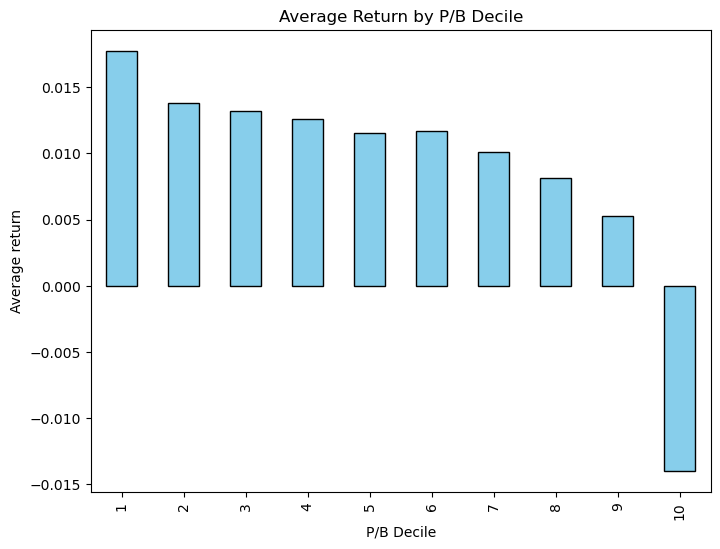

In [54]:
decile_pb_averages = monthly_decile_averages.groupby('PB_Decile')['Monthly_Return'].mean()

plt.figure(figsize=(8, 6))
decile_pb_averages.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Return by P/B Decile')
plt.xlabel('P/B Decile')
plt.ylabel('Average return')
plt.xticks(ticks=range(len(decile_pb_averages)), labels=range(1, 11))  # Assuming deciles are 0-indexed
plt.show()